
# CRIM Intervals:  Melodic and Harmonic

### What You Can Do with this Notebook:

* Show all **melodic** and **harmonic** intervals (diatonic, chromatic, and zero-based) in a piece
* Render charts of intervals
* Show **ngrams** of these melodic and harmonic intervals in a given piece
* Search for **ngrams** in one piece or a whole corpus of them

### Reminders:

#### Import Music Files

* If you are exploring pieces from CRIM, importing simply involves providing the CRIM URL of the MEI file:  

> `piece = importScore('https://crimproject.org/mei/CRIM_Model_0008.mei')`

* But you can also use the Notebook with any MEI, MusicXML, or MIDI file of your own. You can easily do this when you run the Notebooks on Jupyter Hub, you will also find a folder called `Music_Files`.  Upload the file here, then provide the path to that file: 

> `piece = importScore('Music_Files/My_File_Name.mei')`


#### Read Documentation for Each Method
- Read the documentation with this command `print(ImportedPiece.YourMethod.__doc__)`, where you will replace `'YourMethod'` with the name of the individual method, for example `print(ImportedPiece.melodic.__doc__)`


*** 

## A. Import Intervals and Other Code

* The first step is to import all the code required for the Notebook
* **`arrow/run`** or **`Shift + Enter`** in the following cell:

In [1]:
import intervals
from intervals import * 
from intervals import main_objs
import intervals.visualizations as viz
import pandas as pd
import re
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
from pandas.io.json import json_normalize
from pyvis.network import Network
from IPython.display import display
import requests
import os
import glob as glob


MYDIR = ("saved_csv")
CHECK_FOLDER = os.path.isdir(MYDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MYDIR)
    print("created folder : ", MYDIR)
else:
    print(MYDIR, "folder already exists.")
    
MUSDIR = ("Music_Files")
CHECK_FOLDER = os.path.isdir(MUSDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MUSDIR)
    print("created folder : ", MUSDIR)
else:
    print(MUSDIR, "folder already exists.")

created folder :  saved_csv
created folder :  Music_Files


## B. Importing a Piece

### B.1 Import a Piece

In [2]:
# Select a prefix:

# prefix = 'Music_Files/'
prefix = 'https://crimproject.org/mei/'
# Add your filename here

mei_file = 'CRIM_Mass_0007_5.mei'

# join the strings and import piece
url = prefix + mei_file
piece = importScore(url)

print(piece.metadata)


{'title': 'Missa Je suis déshéritée: Agnus Dei', 'composer': 'Nicolas Gombert', 'date': 1557}


## C. Melodic Patterns

** CRIM Intervals, as the name suggests, can tell us a lot about the **distances between notes**

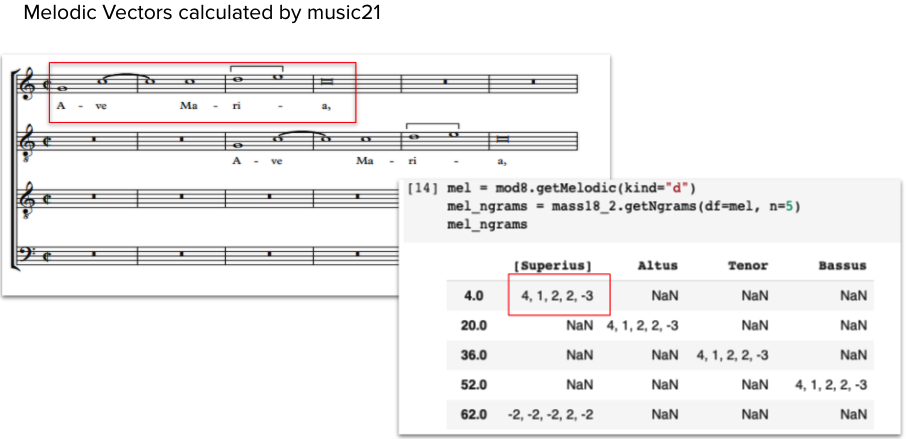


### C.1 Get the melodic intervals for each voice

* **`piece.melodic(kind="d")`** is the basic method to find any type of melodic interval

* Note that **`kind`** is a variable--you can change it, then run the cell to see the results.
<br>

>`q` = **diatonic with 'quality'** (thus distinguishing between P8, M3, and m3 intervals)<br>
>`d` = **diatonic without quality** (just the interval:  8, 3)<br>
>`c` = **chromatic** (here a unison will be **0**, and a tritone will be **6**)<br>
>`z` = **zero-based** (diatonic, but with unison is represented as "0")<br>
<br>
    
* compound intervals?

    * add `compound=True` to see 10ths and 3rds as different; `compound=False` for them to be the same.  
    * For example:  
    
>`piece.melodic(kind="d", compound=True).fillna('-')`
  
* no unisons?
<br>
    * adding `combineUnisons=True` to the request for `piece.notes()` will combine all unisons to a single note.  The total duration will be the same as for the individual notes, but now Melodic (and Ngrams) will follow the contour of the melody as if there were no repeated note. For example:  
    
>`nr = piece.notes(combineUnisons=True)
piece.melodic(df=nr, kind="d")`

* regularize to some specific duration?
<br>
    * Setting the `unit=n` argument allows you to regularize the results.
0 is without regularization. `2` regularizes to half-note, `4` to the whole note, etc.
    
* Read the Documentation:  `print(ImportedPiece.melodic.__doc__)`
    

In [3]:
# Read the Documentation:  
# print(ImportedPiece.melodic.__doc__)


In [4]:
nr = piece.notes(combineUnisons=False)
piece.melodic(df=nr, kind="d").head(20)


,[Superius 1],[Superius 2],[Contratenor],[Tenor],I. Bassus,[II. Bassus]
0.0,Rest,Rest,Rest,Rest,Rest,NaN
8.0,NaN,NaN,NaN,NaN,NaN,3
10.0,NaN,NaN,1,NaN,NaN,NaN
12.0,NaN,NaN,2,NaN,NaN,2
16.0,NaN,NaN,NaN,NaN,NaN,-8
18.0,NaN,NaN,-2,NaN,NaN,3
19.0,NaN,NaN,-2,NaN,NaN,NaN
20.0,NaN,NaN,-2,NaN,NaN,NaN
22.0,NaN,NaN,2,NaN,NaN,-2
23.0,NaN,NaN,NaN,NaN,NaN,-2


In [5]:
nr = piece.notes(combineUnisons=False)
mel = piece.melodic(df=nr, kind="d")
mel.head(15)
ng = piece.ngrams(df=mel, n=3)
ng.head(50)

,[Superius 1],[Superius 2],[Contratenor],[Tenor],I. Bassus,[II. Bassus]
8.0,NaN,NaN,NaN,NaN,NaN,"(3, 2, -8)"
10.0,NaN,NaN,"(1, 2, -2)",NaN,NaN,NaN
12.0,NaN,NaN,"(2, -2, -2)",NaN,NaN,"(2, -8, 3)"
16.0,NaN,NaN,NaN,NaN,NaN,"(-8, 3, -2)"
18.0,NaN,NaN,"(-2, -2, -2)",NaN,NaN,"(3, -2, -2)"
19.0,NaN,NaN,"(-2, -2, 2)",NaN,NaN,NaN
20.0,NaN,NaN,"(-2, 2, 2)",NaN,NaN,NaN
22.0,NaN,NaN,"(2, 2, 2)",NaN,NaN,"(-2, -2, 5)"
23.0,NaN,NaN,NaN,NaN,NaN,"(-2, 5, -5)"
24.0,"(1, 3, 2)",NaN,"(2, 2, -2)","(3, 2, -4)",NaN,NaN


### C.2  Counting Intervals (and other operations)

* The Pandas library includes a vast array of standard methods for working with data frames (renaming columns, sorting data, counting categories, etc).  You can read just a few of the basic ones here:  **https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf**

<br>

* Using our dataframe of notes+rests (**`nr`**), you can experiment with a few (try them out below):

    * **count the number of rows** (which tells us simply how large the dataframe is):  **`nr.count`**
    * **rename a columns**:  **`nr.rename(columns = {'[Superius]':'Cantus'})`**
    * **stack all the columns** on top of each other to get one list of all the notes:  **`nr.stack()`**
    * **stack and count the number of unique values** (which will tell us how many different tones are in this piece): **`nr.stack().nunique()`**
    * **count the number of each note in each part**:  **`nr.apply(pd.Series.value_counts).fillna(0).astype(int)`**
    * **count and sort** the number of notes in a single voice part:  **`nr.apply(pd.Series.value_counts).fillna(0).astype(int).sort_values("[Superius]", ascending=False)`**

In [6]:
# Sort All Intervals by Size and Direction, with counts for each voice

int_order = ["P1", "m2", "M2", "m3", "M3", "P4", "P5", "m6", "M6", "m7", "M7", "P8",
             "-m2", "-M2", "-m3", "-M3", "-P4", "-P5", "-m6", "-M6", "-m7", "-M7", "-P8"]
mel = piece.melodic()
mel = mel.fillna("-")

# count up the values in each item column--sum for each pitch.  
# make a copy to be sure we don't mess up
mel = mel.apply(pd.Series.value_counts).fillna(0).astype(int).reset_index().copy()

# rename the index column to something more useful
mel.rename(columns = {'index':'interval'}, inplace = True)

# apply the categorical list and sort
mel['interval'] = pd.Categorical(mel["interval"], categories=int_order)
mel = mel.sort_values(by = "interval").dropna().copy()
mel.reset_index()

,index,interval,[Superius 1],[Superius 2],[Contratenor],[Tenor],I. Bassus,[II. Bassus]
0,10,P1,29,6,21,10,10,11
1,15,m2,13,5,12,12,5,11
2,8,M2,24,16,27,27,16,25
3,16,m3,9,8,6,8,6,10
4,9,M3,0,0,0,1,1,2
5,11,P4,2,3,15,14,5,4
6,12,P5,0,1,4,2,3,8
7,17,m6,0,0,0,1,0,1
8,13,P8,0,2,0,1,0,1
9,6,-m2,19,18,27,25,5,13


### Chart of Intervals in Each Voice


title : Missa Je suis déshéritée: Agnus Dei
composer : Nicolas Gombert
date : 1557


<AxesSubplot: xlabel='interval'>

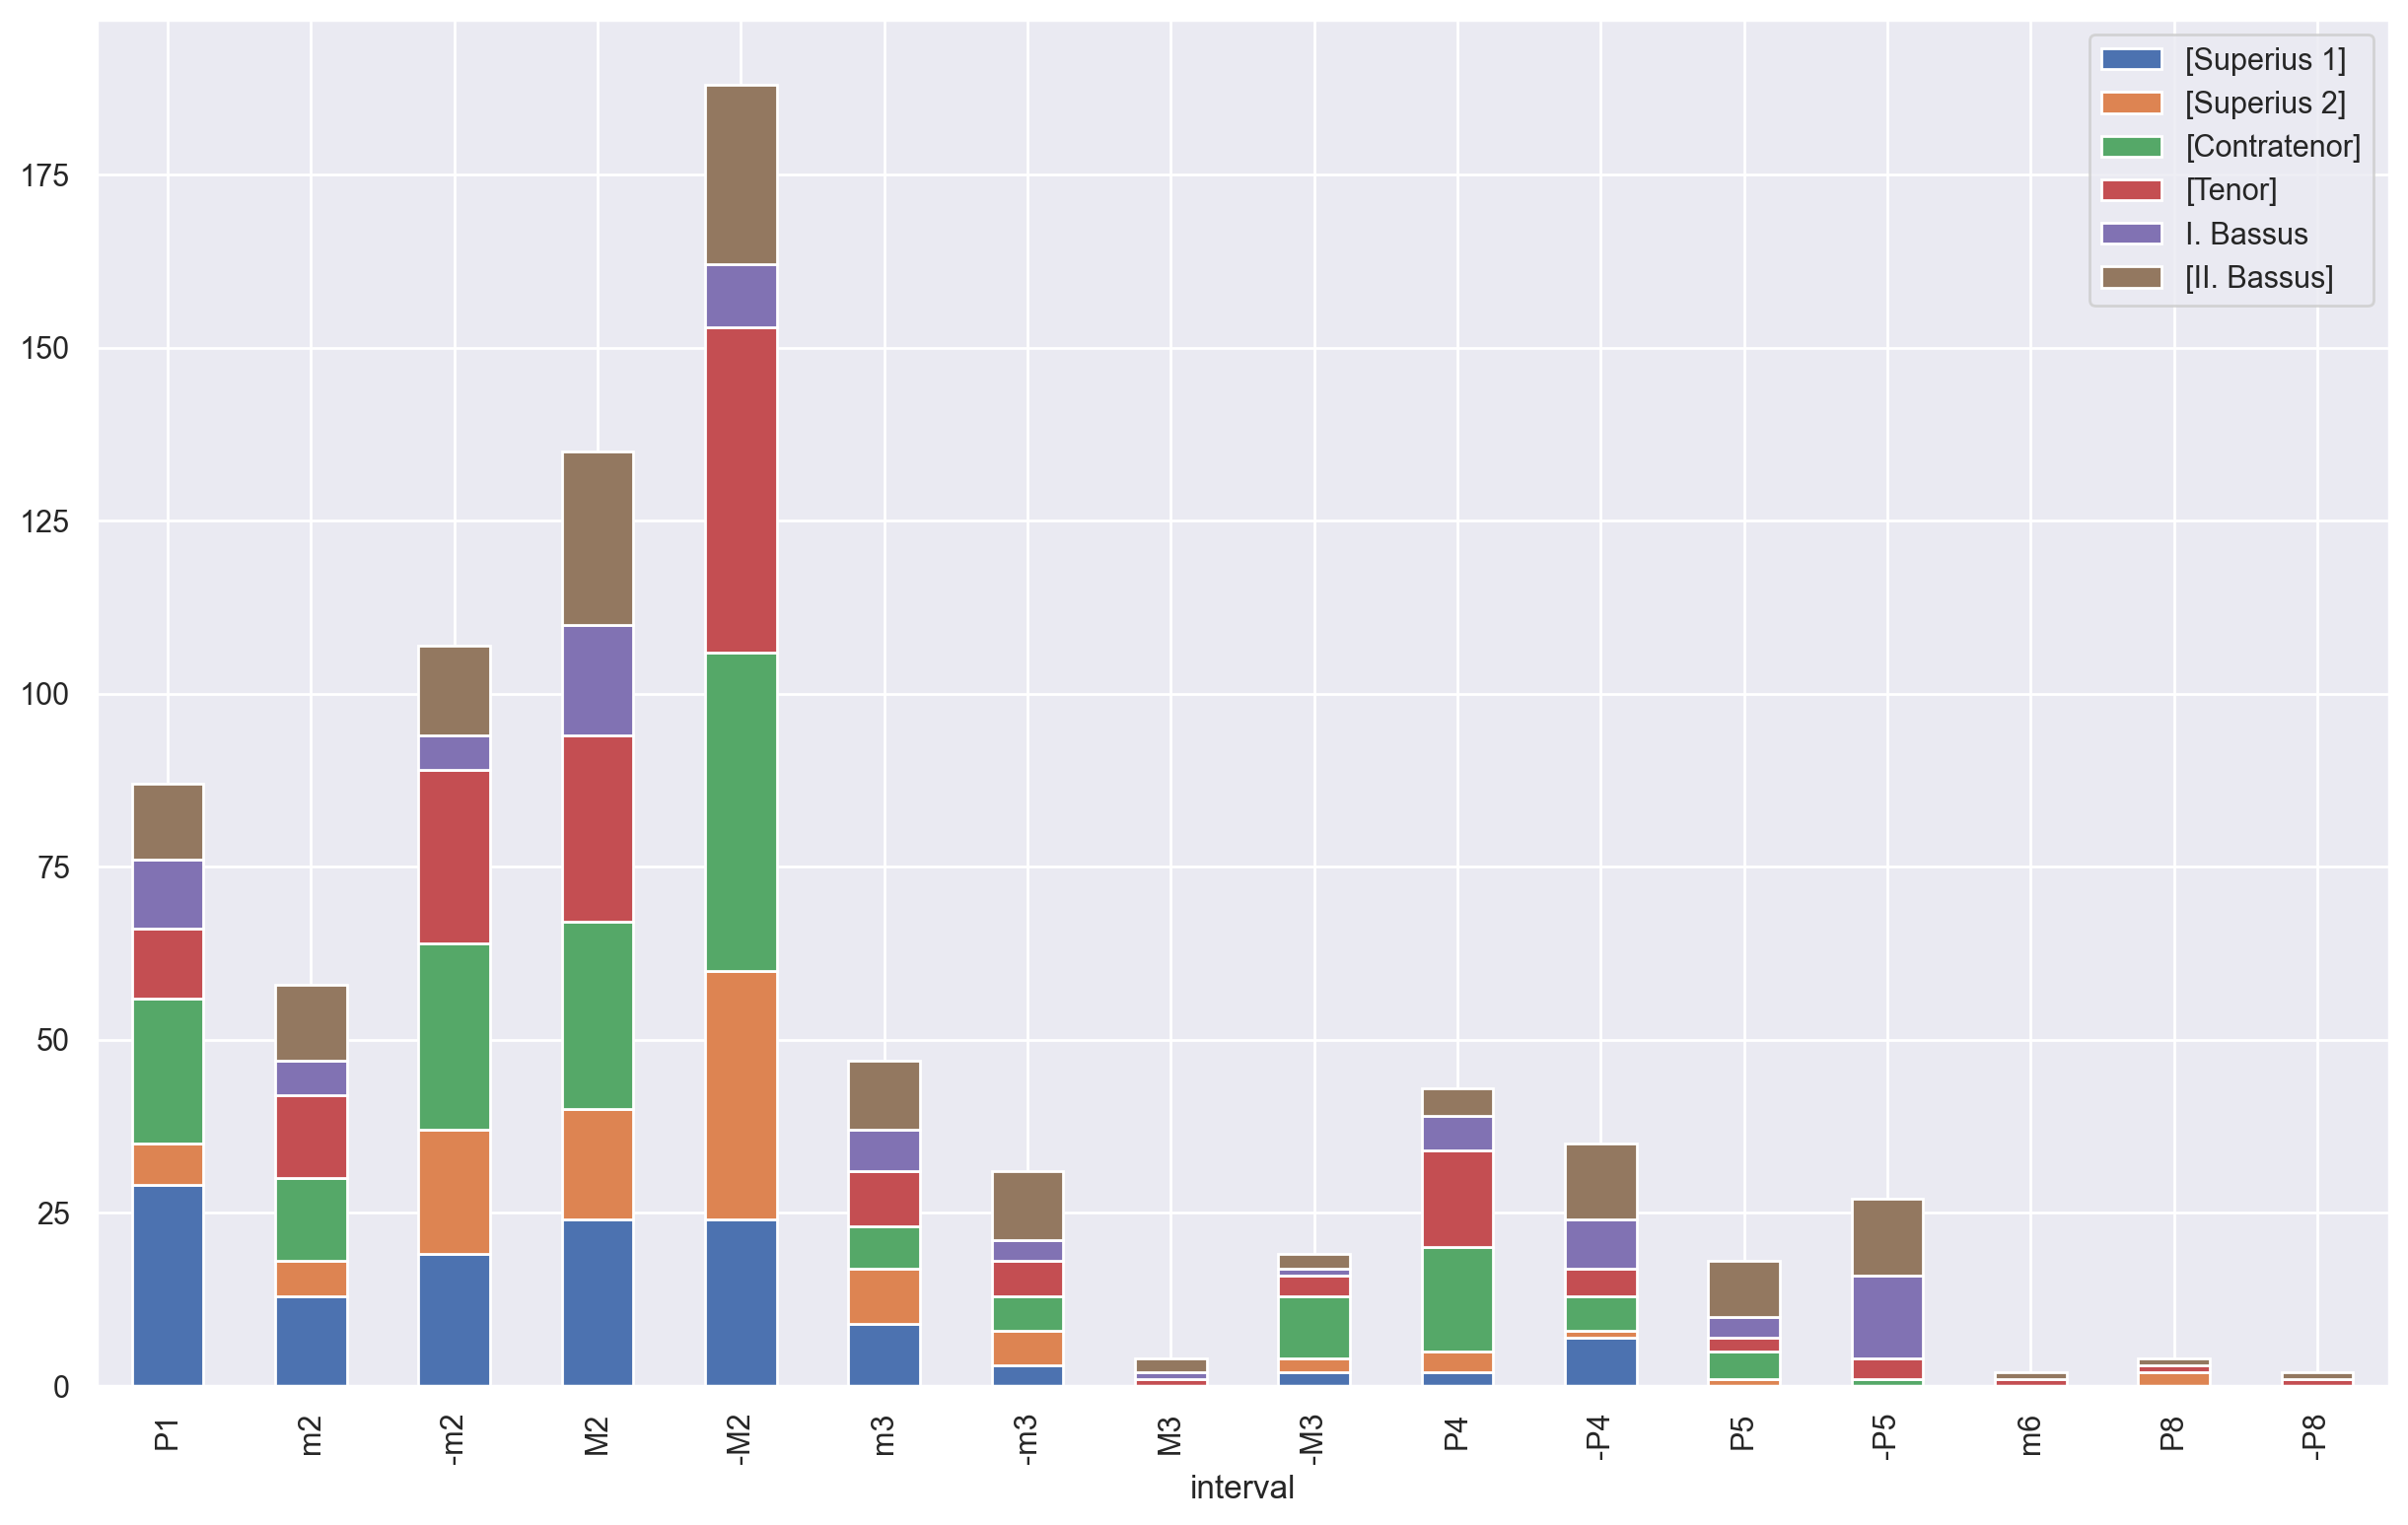

In [7]:
%matplotlib inline
int_order = ["P1", "m2", "-m2", "M2", "-M2", "m3", "-m3", "M3", "-M3", "P4", "-P4", "P5", "-P5", 
             "m6", "-m6", "M6", "-M6", "m7", "-m7", "M7", "-M7", "P8", "-P8"]

mel = piece.melodic()
mel = mel.fillna("-")

# count up the values in each item column--sum for each pitch.  
# make a copy to be sure we don't mess up
mel = mel.apply(pd.Series.value_counts).fillna(0).astype(int).reset_index().copy()

# rename the index column to something more useful
mel.rename(columns = {'index':'interval'}, inplace = True)

# apply the categorical list and sort
mel['interval'] = pd.Categorical(mel["interval"], categories=int_order)
mel = mel.sort_values(by = "interval").dropna().copy()

voices = mel.columns.to_list()
palette = sns.husl_palette(len(voices), l=.4)
md = piece.metadata
for key, value in md.items():
    print(key, ':', value)
# print(voices)
sns.set(rc={'figure.figsize':(15,9)})
mel.set_index('interval').plot(kind='bar', stacked=True)


### C.2 Get Melodic nGrams
* **Ngrams** are used in linguistics (and other fields)--they are continuous strings of characters or events, and can help us find similar **soggetti** or even predict **presentation types**.
<br><br>
* CRIM Intervals can create **melodic** or **harmonic** nGrams.  These can be some **fixed length**, or up to the **maximum before the next rest**.  We set this length with the `n` (as in `n=4`; to use maximum length nGrams, use `n=-1` [negative one])
<br><br>
* To use the `ngrams` method, we "pass" the results of `piece.melodic()` or `piece.harmonic()` (see below) to it.  For instance we set the variable name `mel` = `piece.melodic(kind="d", compound=False)` , and then pass `mel` to the nGram method, for instance:  `piece.ngrams(df=mel, n=4)`  
<br>
* We could also combine these steps in a single line of code: 
>`ngrams = piece.ngrams(df=piece.melodic(kind="d", compound=False), n=4)`
    
* **Moving Window** or **Limit to Entries**?

    * By default the melodic ngrams will be a **moving window** of whatever length 'n' is chosen.  So for n="4" we would see notes 1-4, 2-5, 3-6, etc as the results.  This is helpful if you would like to see all of the substrings in a melody.
    * But **Limit to Entries** can be useful if we only want ngrams that follow a rest or section break, as these are useful in finding key Presentation Types or other markers of 'segments' in the piece.  For this we use a mask: 

> `nr = piece.notes(combineUnisons=True)`

> `mel = piece.melodic(df=nr, kind='d', end=False)`

> `ng = piece.ngrams(df=mel, n=3)`

> `mask = piece.entryMask()`

> `result = ng[mask].dropna(how='all').fillna('')`

> `result.head(20)`

   
* **No Unisons**?  
    * As noted above, we can use `combineUnisons=True` to remove repeated notes from nGrams.  See cell below.
    
* **Drop NULL (NaN) values**?
    * `dropna(how="all")` allows you to all rows (offsets) where all voices are silent (NaN in all parts)
    * `fillna('-')` allows you to fill NaNs will any character
    
* **Read the documentation**:  `print(piece.ngrams.__doc__)`

In [8]:
# ALL the ngrams--the 'moving window'
nr = piece.notes(combineUnisons=True)
mel = piece.melodic(df=nr, kind='d', end=False)
ng = piece.ngrams(df=mel, n=3).fillna('')
ng.head(40)


,[Superius 1],[Superius 2],[Contratenor],[Tenor],I. Bassus,[II. Bassus]
0.0,,,,,,"(3, 2, -8)"
4.0,,,"(2, -2, -2)",,,
8.0,,,,,,"(2, -8, 3)"
12.0,,,"(-2, -2, -2)",,,"(-8, 3, -2)"
16.0,,,,"(3, 2, -4)",,"(3, -2, -2)"
18.0,,,"(-2, -2, 2)",,,"(-2, -2, 5)"
19.0,,,"(-2, 2, 2)",,,
20.0,"(3, 2, -4)",,"(2, 2, 2)",,,
22.0,,,"(2, 2, -2)",,,"(-2, 5, -5)"
24.0,,,"(2, -2, -2)","(2, -4, 6)",,


In [9]:
piece.verovioCadences()

[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported data.PERCENT '100'
[Warning] Unsupported '<line>' within <measure>


Results:
File Name:  CRIM_Mass_0007_5
Nicolas Gombert
Missa Je suis déshéritée: Agnus Dei
Cadence End Measure: 9
Beat:  3.0
Cadence Tone:  A
Cadence Type:  Phrygian Clausula Vera
Cadential Voice Functions:  TC


Results:
File Name:  CRIM_Mass_0007_5
Nicolas Gombert
Missa Je suis déshéritée: Agnus Dei
Cadence End Measure: 13
Beat:  1.0
Cadence Tone:  D
Cadence Type:  Clausula Vera
Cadential Voice Functions:  CT


Results:
File Name:  CRIM_Mass_0007_5
Nicolas Gombert
Missa Je suis déshéritée: Agnus Dei
Cadence End Measure: 15
Beat:  1.0
Cadence Tone:  D
Cadence Type:  Clausula Vera
Cadential Voice Functions:  CT


Results:
File Name:  CRIM_Mass_0007_5
Nicolas Gombert
Missa Je suis déshéritée: Agnus Dei
Cadence End Measure: 19
Beat:  1.0
Cadence Tone:  A
Cadence Type:  Phrygian Clausula Vera
Cadential Voice Functions:  CT


Results:
File Name:  CRIM_Mass_0007_5
Nicolas Gombert
Missa Je suis déshéritée: Agnus Dei
Cadence End Measure: 23
Beat:  1.0
Cadence Tone:  nan
Cadence Type:  Abandoned Authentic
Cadential Voice Functions:  cx


Results:
File Name:  CRIM_Mass_0007_5
Nicolas Gombert
Missa Je suis déshéritée: Agnus Dei
Cadence End Measure: 23
Beat:  3.0
Cadence Tone:  nan
Cadence Type:  Evaded Clausula Vera
Cadential Voice Functions:  Tc


Results:
File Name:  CRIM_Mass_0007_5
Nicolas Gombert
Missa Je suis déshéritée: Agnus Dei
Cadence End Measure: 25
Beat:  4.0
Cadence Tone:  nan
Cadence Type:  nan
Cadential Voice Functions:  aT


Results:
File Name:  CRIM_Mass_0007_5
Nicolas Gombert
Missa Je suis déshéritée: Agnus Dei
Cadence End Measure: 26
Beat:  1.0
Cadence Tone:  A
Cadence Type:  nan
Cadential Voice Functions:  CCTP


Results:
File Name:  CRIM_Mass_0007_5
Nicolas Gombert
Missa Je suis déshéritée: Agnus Dei
Cadence End Measure: 35
Beat:  1.0
Cadence Tone:  D
Cadence Type:  Altizans Only
Cadential Voice Functions:  AT


Results:
File Name:  CRIM_Mass_0007_5
Nicolas Gombert
Missa Je suis déshéritée: Agnus Dei
Cadence End Measure: 38
Beat:  1.0
Cadence Tone:  D
Cadence Type:  Authentic
Cadential Voice Functions:  CTB


Results:
File Name:  CRIM_Mass_0007_5
Nicolas Gombert
Missa Je suis déshéritée: Agnus Dei
Cadence End Measure: 40
Beat:  1.0
Cadence Tone:  A
Cadence Type:  Phrygian Clausula Vera
Cadential Voice Functions:  CT


Results:
File Name:  CRIM_Mass_0007_5
Nicolas Gombert
Missa Je suis déshéritée: Agnus Dei
Cadence End Measure: 44
Beat:  1.0
Cadence Tone:  A
Cadence Type:  Phrygian Clausula Vera
Cadential Voice Functions:  CT


Results:
File Name:  CRIM_Mass_0007_5
Nicolas Gombert
Missa Je suis déshéritée: Agnus Dei
Cadence End Measure: 46
Beat:  1.0
Cadence Tone:  D
Cadence Type:  Authentic
Cadential Voice Functions:  CSB


Results:
File Name:  CRIM_Mass_0007_5
Nicolas Gombert
Missa Je suis déshéritée: Agnus Dei
Cadence End Measure: 48
Beat:  1.0
Cadence Tone:  A
Cadence Type:  Phrygian Clausula Vera
Cadential Voice Functions:  CT


Results:
File Name:  CRIM_Mass_0007_5
Nicolas Gombert
Missa Je suis déshéritée: Agnus Dei
Cadence End Measure: 50
Beat:  1.0
Cadence Tone:  F
Cadence Type:  Authentic
Cadential Voice Functions:  CxzB


Results:
File Name:  CRIM_Mass_0007_5
Nicolas Gombert
Missa Je suis déshéritée: Agnus Dei
Cadence End Measure: 53
Beat:  1.0
Cadence Tone:  C
Cadence Type:  Authentic
Cadential Voice Functions:  CxB


Results:
File Name:  CRIM_Mass_0007_5
Nicolas Gombert
Missa Je suis déshéritée: Agnus Dei
Cadence End Measure: 56
Beat:  3.0
Cadence Tone:  F
Cadence Type:  nan
Cadential Voice Functions:  CCx


Results:
File Name:  CRIM_Mass_0007_5
Nicolas Gombert
Missa Je suis déshéritée: Agnus Dei
Cadence End Measure: 61
Beat:  1.0
Cadence Tone:  D
Cadence Type:  nan
Cadential Voice Functions:  CuTx


Results:
File Name:  CRIM_Mass_0007_5
Nicolas Gombert
Missa Je suis déshéritée: Agnus Dei
Cadence End Measure: 65
Beat:  3.0
Cadence Tone:  D
Cadence Type:  Authentic
Cadential Voice Functions:  CxTB


Results:
File Name:  CRIM_Mass_0007_5
Nicolas Gombert
Missa Je suis déshéritée: Agnus Dei
Cadence End Measure: 67
Beat:  1.0
Cadence Tone:  G
Cadence Type:  Authentic
Cadential Voice Functions:  CB


Results:
File Name:  CRIM_Mass_0007_5
Nicolas Gombert
Missa Je suis déshéritée: Agnus Dei
Cadence End Measure: 68
Beat:  3.0
Cadence Tone:  A
Cadence Type:  Phrygian
Cadential Voice Functions:  CPT


### HERE WE LIMIT TO 'ENTRIES' (SOGGETTI THAT START AFTER A REST OR SECTION BREAK)

nr = piece.notes(combineUnisons=True)
mel = piece.melodic(df=nr, kind='d', end=False)
ng = piece.ngrams(df=mel, n=3)
mask = piece.entryMask()
result = ng[mask].dropna(how='all').fillna('')
result.head(20)

In [10]:
pd.options.display.max_rows = 999


We can also display **measure+beat addresses**

*  The results of the previous **ngram** method are now 'passed' to the **detailIndex** method

In [11]:
piece.detailIndex(df=result, offset=False, beat=True)

,,[Superius],Altus,Tenor,Bassus
Measure,Beat,,,,
1,1.0,"(4, 2, 2)",,,
3,1.0,,"(4, 2, 2)",,
5,1.0,,,"(4, 2, 2)",
7,1.0,,,,"(4, 2, 2)"
8,1.0,"(-2, -2, -2)",,,
10,1.0,,"(-2, -2, -2)",,
12,1.0,,,"(-2, -2, -2)",
14,1.0,,,,"(-2, -2, -2)"
16,3.0,"(2, 2, -3)",,,


## Show the Ngrams with a Heatmap

In [81]:
@interact
def get_plot(entries_only = [True, False],
             combine_unisons=[False, True], 
             kind=["d", "q", "c", "z"], 
             compound=[True, False], 
             length=[5, 2, 3, 4, 6],
            regularize=[0, 1, 2, 4],
            top_patterns=["all", 5, 10, 20]):
    if entries_only == True:
        nr = piece.notes(combineUnisons=combine_unisons)
        # unit MUST be 0 for "limit to entries" 
        mel = piece.melodic(df=nr, kind=kind, compound=compound, unit=0, end=False)
        mel_ngrams = piece.ngrams(df=mel, n=length)
        entry_ngrams = piece.entries(df=mel, n=length)
        mel_ngrams_duration = piece.durations(df=mel, n=length, mask_df=entry_ngrams)
        if top_patterns == "all":
            return viz.plot_ngrams_heatmap(entry_ngrams, mel_ngrams_duration, selected_patterns=[], voices=[])
        else:
            mel_ngrams_top_patterns_df = entry_ngrams.stack().value_counts().to_frame().head(top_patterns)
            mel_ngrams_top_patterns_list = mel_ngrams_top_patterns_df.index.to_list()
#             return mel_ngrams_top_patterns_list
            return viz.plot_ngrams_heatmap(entry_ngrams, mel_ngrams_duration, selected_patterns=mel_ngrams_top_patterns_list, voices=[])
    else:
        if top_patterns == "all":
            nr = piece.notes(combineUnisons=combine_unisons)
            mel = piece.melodic(df=nr, kind=kind, compound=False, unit=regularize, end=False)
            mel_ngrams = piece.ngrams(df=mel, n=length)
            mel_ngrams_duration = piece.durations(df=mel, n=5, mask_df=mel_ngrams)
            return viz.plot_ngrams_heatmap(mel_ngrams, mel_ngrams_duration, selected_patterns=[], voices=[])           
        else:
            mel = piece.melodic(kind='d', compound=False, unit=regularize)
            mel_ngrams = piece.ngrams(df=mel, n=5)
            mel_ngrams_duration = piece.durations(df=mel, n=5, mask_df=mel_ngrams)
            mel_ngrams_top_patterns_df = mel_ngrams.stack().value_counts().to_frame().head(top_patterns)
            mel_ngrams_top_patterns_list = mel_ngrams_top_patterns_df.index.to_list()
            return viz.plot_ngrams_heatmap(mel_ngrams, mel_ngrams_duration, selected_patterns=mel_ngrams_top_patterns_list, voices=[])

interactive(children=(Dropdown(description='entries_only', options=(True, False), value=True), Dropdown(descri…

### C.3 How Many nGrams?

* Pandas includes many **built-in methods** that make it simple to summarize and explore data

* `value_counts()` tells us how many of each nGram in each voice:  

>`ngrams.value_counts().to_frame()`

* `stack()` combines all the voices into one column, so we can see the nGrams of the piece in one view: 

>`ngrams.stack().value_counts().to_frame()`

In [25]:
# ngrams = piece.ngrams()
result.value_counts().to_frame()

0
[Superius]   Altus        Tenor        Bassus         
             (-2, -2, -2)                            4
                          (2, 2, -3)                 3
             (2, 2, 2)                               2
(-2, -2, -2)                                         2
(2, -2, -2)                                          2
                                       (-2, -2, -3)  2
             (-2, -3, 2)                             2
                          (2, -2, -2)                2
(4, 2, 2)                                            2
                          (2, -3, 2)                 1
                          (-2, -2, 2)                1
                          (-2, 3, -2)  (5, -2, -2)   1
                          (-3, -2, 8)                1
                          (-3, 2, -2)                1
                          (2, -3, 2)   (5, 2, -2)    1
(-2, -2, -2) (-3, 2, 2)   (-2, 2, 2)   (8, -4, 2)    1
             (4, 2, 2)                               1
                          (2, 2, 2)    (-2, -2, -2)  1
                                       (3, 2, 2)     1
                          (4, -2, 2)                 1
                          (4, 2, 2)                  1
                                       (-2, -2, -2)  1
                                       (-3, -2, 2)   1
                                       (-3, 4, -2)   1
                                       (2, -3, 2)    1
                                       (2, 2, -3)    1
                                       (4, -2, 2)    1
                          (-2, -2, -2)               1
             (2, 2, -3)                              1
             (4, -2, 2)                              1
(2, 2, -3)   (2, -2, -2)                             1
(-2, -2, 2)                                          1
(-2, -2, 5)                                          1
(-3, -2, 4)                                          1
(2, -2, -2)  (-2, -2, -2)                            1
             (2, 2, 2)    (2, -2, -2)  (4, -2, 2)    1
(2, -3, 2)   (5, 2, -2)                              1
                                                     1
(2, 2, -3)   (2, -2, -2)               (-5, 2, -5)   1
                                                     1
             (2, 2, -2)                              1
(2, 2, 2)    (3, 2, 2)                               1
                          (-2, -2, 2)  (5, -2, -2)   1
                                                     1
(4, -2, 2)                                           1
             (-2, -2, 2)                             1
             (-2, -2, 4)                             1
             (-3, -2, 2)                             1
             (2, -3, 2)                              1
                                       (4, 2, 2)     1

In [37]:
result.stack().value_counts().to_frame()

,0
,158
"(2, -2, -2, -2)",9
"(2, 2, 2, -2)",7
"(-2, -2, -2, 2)",7
"(2, -3, 2, -3)",4
"(4, -2, 2, 2)",4
"(-2, -2, -2, -2)",4
"(4, 2, 2, -3)",4
"(-2, -2, -3, 5)",2
"(2, -3, 2, -2)",2


### C.4 Search for Melodic nGrams

*  Here we can use Python tools to **search for any given 'string' of intervals**, and highlight them in the resulting data frame.
<br>

    * Note that we can also search at any given **constant time unit** (such as every 2 offsets = half note)
    * To do this we just add `unit=n` to the `getNgrams` request
    * We can also select to display as offsets or measures/beats
    
<br>

* Use the boxes below to **interact** with the code without needing to write it!
    * `search_pattern` returns any nGram with the interval sequence you use.  Include comma and space after each interval.
    * `kind` selects **quality**, **diatonic**, **chromatic**, or **zero**
    * `compound` will be **true** or **false**
    * `length` is the **length** of the `nGram` (three intervals is of course four notes); use `-1` for maximum length before any given rest.
    * `style` determines whether the results are listed by **offset** or **measure + beat**
    * `endpoint` determines whether the offset (or measure + beat) represents **first note** of the pattern or the **last**.  

<br>

* Sample search for **Model_0008**:  `4, 1, 2, 2, -3`  (use `kind="d"` and `length=5`)

<br>
    * Notice the regular time intervals between identical nGrams--the **classifier** can use this to predict presentation types.

In [26]:
nr = piece.notes(combineUnisons=True)

In [82]:
def convertTuple(tup):
    out = ""
    if isinstance(tup, tuple):
        out = ', '.join(tup)
    return out
@interact
def get_ngrams(search_pattern="", kind=["d", "q", "c", "z"], unisons=[False, True], compound=[True, False], length=[2, 3, 4, 5, 6], endpoint=["first", "last"]):
    nr = piece.notes(combineUnisons=unisons)
    ngrams = piece.ngrams(df=piece.melodic(df=nr, kind=kind), n=length, offsets=endpoint)
    ngrams = ngrams.applymap(convertTuple)
    mask = ngrams.apply(lambda x: x.apply(str).str.contains(search_pattern).any(), axis=1)

    filtered_ngrams = ngrams[mask].copy()
    filtered_ngrams.astype(str).copy
    
    beats_measures_mel = piece.detailIndex(filtered_ngrams, offset=True)

    return beats_measures_mel.fillna("-").applymap(str).style.applymap(lambda x: "background: #ccebc5" if re.search(search_pattern, x) else "")

    

interactive(children=(Text(value='', description='search_pattern'), Dropdown(description='kind', options=('d',…

## D. Harmonic Intervals and nGrams

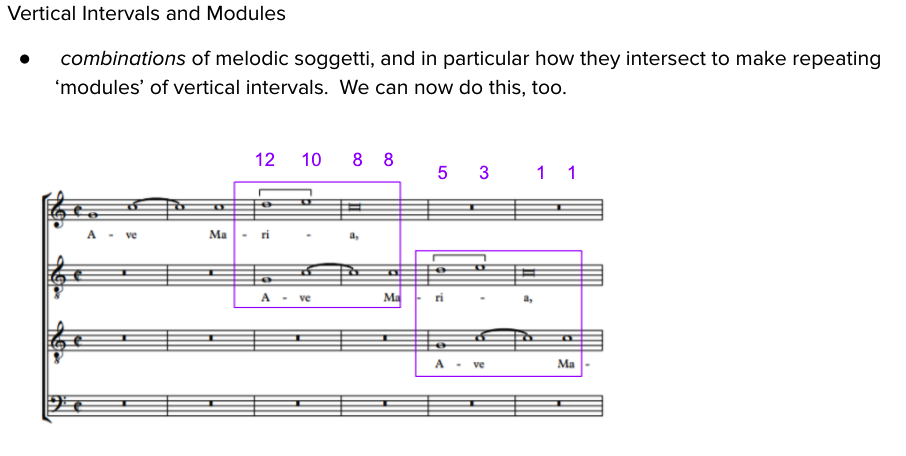

In [24]:
# Read the Documentation:  
# print(ImportedPiece.harmonic.__doc__)

### D.1 Harmonic Intervals

* Specify **kind** as above (`q`, `d`, `c`, `z`)
* Choose **compound** (`=True`) or **simple** (`=False`)
* For example:  **`piece.harmonic(kind="d", compound=True)`**

**Drop NULL (NaN) values?**

* dropna(how="all") allows you to all rows (offsets) where all voices are silent (NaN in all parts)
fillna('-') allows you to fill NaNs will any character. For example:  

>`piece.harmonic(kind="d", compound=True).fillna('-')`


In [48]:
harm = piece.harmonic(kind="c", compound=False).fillna("")
piece.detailIndex(harm, offset=True).head(40)


Bassus_Sextus Bassus_Tenor Bassus_Quintus Bassus_Altus  \
Measure Beat Offset                                                          
1       1.0  0.0             Rest         Rest           Rest         Rest   
2       1.0  8.0             Rest         Rest           Rest         Rest   
        4.0  14.0                                                     Rest   
3       1.0  16.0            Rest         Rest           Rest         Rest   
        3.0  20.0                                                     Rest   
        4.0  22.0                         Rest                               
4       1.0  24.0            Rest         Rest           Rest         Rest   
        3.0  28.0            Rest         Rest                        Rest   
5       1.0  32.0               0            3              7            7   
        2.0  34.0                                                            
        2.5  35.0                                                            
        3.0  36.0                                                     Rest   
        4.0  38.0               0                                            
6       1.0  40.0               3            7              3         Rest   
        3.0  44.0               0            3                               
        4.0  46.0               0            3              3         Rest   
7       1.0  48.0               4            7              4         Rest   
        3.0  52.0               7            0              3         Rest   
8       1.0  56.0               4           11              4         Rest   
        2.0  58.0                            9                               
        2.5  59.0                            7                               
        3.0  60.0            Rest            9                               
        4.0  62.0               4                                            
        4.5  63.0                            4                               
9       1.0  64.0               0            7              3         Rest   
        2.0  66.0                                                            
        3.0  68.0                                                        0   
        4.0  70.0              10                                            
10      1.0  72.0            Rest         Rest           Rest         Rest   
        2.0  74.0                                                            
        2.5  75.0            Rest                                            
        3.0  76.0            Rest         Rest                               
        4.0  78.0            Rest                                     Rest   
        4.5  79.0                                                            
11      1.0  80.0            Rest         Rest           Rest         Rest   
        2.0  82.0                                                            
        2.5  83.0            Rest                                     Rest   
        3.0  84.0            Rest                                     Rest   
        4.0  86.0                                                     Rest   
12      1.0  88.0            Rest         Rest           Rest         Rest   

                    Bassus_Cantus Sextus_Tenor Sextus_Quintus Sextus_Altus  \
Measure Beat Offset                                                          
1       1.0  0.0             Rest         Rest           Rest         Rest   
2       1.0  8.0             Rest         Rest           Rest         Rest   
        4.0  14.0            Rest                                     Rest   
3       1.0  16.0            Rest         Rest           Rest         Rest   
        3.0  20.0            Rest                                     Rest   
        4.0  22.0                         Rest                               
4       1.0  24.0            Rest         Rest           Rest         Rest   
        3.0  28.0            Rest        

### D.2 Harmonic NGrams

* **Ngrams** are used in linguistics (and other fields)--they are continuous strings of characters or events, and can help us find similar **soggetti** or even predict **presentation types**.

* CRIM Intervals can create **harmonic** nGrams.  These can be some **fixed length**, or up to the **maximum before the next rest**.  We set this length with the `n` (as in `n=4`; to use maximum length nGrams, use `n=-1` [negative one])

* To use the `ngrams` method, we "pass" the results of `piece.harmonic()` to it.  For instance we set the variable name `har` = `piece.harmonic(kind="d", compound=False)` , and then pass `har` to the nGram method. For instance: 

>`piece.ngrams(df=har, n=4)`  

* We could also combine these steps in a single line of code: 

>`ngrams = piece.ngrams(df=piece.harmonic(kind="d", compound=False), n=4)`
   
* **No Unisons?** 
    * As noted above, we can use `combineUnisons=True` to remove repeated notes from nGrams.  See cell below.
    
* **Drop NULL (NaN) values?**
    * `dropna(how="all")` allows you to all rows (offsets) where all voices are silent (NaN in all parts)
    * `fillna('-')` allows you to fill NaNs will any character
* **Real Durations or Sampled at Fixed Value?**
    * By default the ngrams will follow the real durations of the melody.  But it is also possible to **sample by any durational increment**.  For instance `piece.ngrams(unit='2')` will return ngrams based on every half-note (semibreve)

In [49]:
har = piece.harmonic(kind="d", compound=False)

piece.ngrams(df=har, n=4).fillna('-')

,Bassus_Sextus,Bassus_Tenor,Bassus_Quintus,Bassus_Altus,Bassus_Cantus,Sextus_Tenor,Sextus_Quintus,Sextus_Altus,Sextus_Cantus,Tenor_Quintus,Tenor_Altus,Tenor_Cantus,Quintus_Altus,Quintus_Cantus,Altus_Cantus
0.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,"(8, 3, 3, 3)"
8.0,-,-,-,-,-,-,-,-,-,-,"(8, 8, 3, 1)","(3, 3, 5, 3)",-,-,"(3, 3, 3, 3)"
14.0,-,-,-,-,-,-,-,-,-,-,"(8, 3, 1, 1)","(3, 5, 3, 3)",-,-,"(3, 3, 3, 3)"
16.0,-,-,-,-,-,-,-,-,-,-,"(3, 1, 1, 3)","(5, 3, 3, 5)",-,-,"(3, 3, 3, 5)"
20.0,-,-,-,-,-,-,-,-,-,-,"(1, 1, 3, 4)","(3, 3, 5, 8)",-,-,"(3, 3, 5, 4)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558.0,"(5, 6, 5, 3)","(5, 6, 6, 5)","(3, 4, 3, 3)","(8, 3, 3, 5)","(5, 6, 6, 5)","(1, 1, 2, 4)","(6, 6, 8, 7)","(4, 5, 6, 8)","(8, 8, 2, 4)","(6, 6, 5, 5)","(4, 5, 1, 2)",-,"(-3, -2, 1, 1)","(3, 3, 4, 4)","(5, 4, 8, 7)"
560.0,"(6, 5, 3, 3)","(6, 6, 5, 8)","(4, 3, 3, 2)","(3, 3, 5, 6)","(6, 6, 5, 8)","(1, 2, 4, 3)",-,"(5, 6, 8, 3)","(8, 2, 4, 3)","(6, 5, 5, 4)","(5, 1, 2, 3)",-,"(-2, 1, 1, -5)","(3, 4, 4, 5)","(4, 8, 7, 6)"
561.0,"(5, 3, 3, 5)",-,"(3, 3, 2, 8)",-,-,"(2, 4, 3, 4)","(6, 8, 7, 6)","(6, 8, 3, 4)","(2, 4, 3, 4)","(5, 5, 4, 5)",-,-,"(1, 1, -5, -4)","(4, 4, 5, 4)",-
562.0,-,-,"(3, 2, 8, 5)","(3, 5, 6, 3)",-,-,"(8, 7, 6, 8)","(8, 3, 4, 6)",-,-,-,-,"(1, -5, -4, -3)",-,-


### D.3  Search Harmonic nGrams


* See Section **C.4** for explanation of the interactive search.

* Examples:

* Two patterns: `12, 10, 8, 8|5, 3, 1, 1`

* Authentic cadence with 6>8 or 3>1 motion:  `7, 6, 8|2, 3, 1`
 
* Plagal cadence:  `6, 6, 6` at the same time we also see `5, 3, 5` in another pair of voices.  Currently it is not possible to search for both at the same time.


In [24]:
def convertTuple(tup):
    out = ""
    if isinstance(tup, tuple):
        out = ', '.join(tup)
    return out
@interact
def get_ngrams(search_pattern="", kind=["d", "q", "c", "z"], compound=[True, False], length=[2, 3, 4, 5, 6], endpoint=["first", "last"]):
    ngrams = piece.ngrams(df=piece.harmonic(kind=kind, compound=compound), n=length, offsets=endpoint)
    ngrams = ngrams.applymap(convertTuple)
    mask = ngrams.apply(lambda x: x.apply(str).str.contains(search_pattern).any(), axis=1)

    filtered_ngrams = ngrams[mask].copy()
    filtered_ngrams.astype(str).copy
    
    beats_measures_har = piece.detailIndex(filtered_ngrams, offset=True)

    return beats_measures_har.fillna("-").applymap(str).style.applymap(lambda x: "background: #ccebc5" if re.search(search_pattern, x) else "")

      

interactive(children=(Text(value='', description='search_pattern'), Dropdown(description='kind', options=('d',…

## E. Corpus Inventory

* The **CorpusBase** class is a convenient way to find patterns in any given list of pieces.
    
* See the **Corpus Methods** Notebook for details, and `print(CorpusBase.batch.__doc__)`

### E.1  Corpus Melodic Inventory

* Also see Corpus Methods Notebook for other ways to import local and remote files!
* Get the `ngrams` for all of the pieces.  
*  In this case:  modules of length "3", with diatonic
*  Then combine them into one frame

* NB: use `ImportedPiece`, not `piece`!
* NB:  `func1` and `func2` do **NOT** include the closing parentheses!

    > `func1 = ImportedPiece.melodic` <br>
    > `list_of_dfs = corpus.batch(func=func1, kwargs={'kind': 'd', 'end': False}, metadata=False)`<br>
    > `func2 = ImportedPiece.ngrams`<br>
    > `list_of_melodic_ngrams = corpus.batch(func=func2, kwargs={'n': 4, 'df': list_of_dfs}, metadata=True)`<br>
    > `title_of_output = pd.concat(list_of_melodic_ngrams)`<br>



#### Import Corpus with URLs

In [38]:
#  first the list of pieces
corpus = CorpusBase(['https://crimproject.org/mei/CRIM_Mass_0050_1.mei',
                     'https://crimproject.org/mei/CRIM_Mass_0050_2.mei',
                     'https://crimproject.org/mei/CRIM_Mass_0050_3.mei',
                     'https://crimproject.org/mei/CRIM_Mass_0050_4.mei',
                     'https://crimproject.org/mei/CRIM_Mass_0050_5.mei'
                     ])

Successfully imported https://crimproject.org/mei/CRIM_Mass_0050_1.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0050_2.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0050_3.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0050_4.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0050_5.mei


#### Import All Local Files

* See Corpus Methods notebook for more options!

In [7]:
corpus  = CorpusBase(['https://crimproject.org/mei/CRIM_Mass_0006_1.mei'])

Successfully imported https://crimproject.org/mei/CRIM_Mass_0006_1.mei


### Corpus Results for Melodic Ngrams

In [39]:

func1 = ImportedPiece.melodic
list_of_dfs = corpus.batch(func=func1, kwargs={'kind': 'd', 'end': False}, metadata=False)
func2 = ImportedPiece.ngrams
list_of_melodic_ngrams = corpus.batch(func=func2, kwargs={'n': 5, 'df': list_of_dfs}, metadata=False)
func3 = ImportedPiece.detailIndex
list_of_detail_index = corpus.batch(func=func3, kwargs={'offset': False,'df': list_of_melodic_ngrams}, metadata=True)

mel_corpus = pd.concat(list_of_detail_index)
comp = mel_corpus.pop("Composer")
mel_corpus['Composer'] = comp
title = mel_corpus.pop("Title")
mel_corpus["Title"] = title
mel_corpus = mel_corpus.fillna('-')


In [40]:
mel_corpus

1                   2                    3  \
Measure Beat                                                               
1       1.0                   -   (-3, -3, 5, 2, 2)                    -   
        3.0    (3, 2, 2, 1, -5)                   -                    -   
2       2.0                   -                   -  (-3, -3, 5, -2, -3)   
        3.0                   -                   -   (-3, 5, -2, -3, 2)   
        4.0                   -                   -   (5, -2, -3, 2, -2)   
...                         ...                 ...                  ...   
52      1.0   (-4, -4, 2, 2, 2)  (3, -2, -3, -2, 2)                    -   
        2.0    (-4, 2, 2, 2, 2)                   -                    -   
        3.5                   -                   -                    -   
        4.0     (2, 2, 2, 2, 1)                   -                    -   
53      1.0                   -                   -                    -   

                                4                    5                  6  \
Measure Beat                                                                
1       1.0                     -                    -                  -   
        3.0                     -                    -                  -   
2       2.0                     -                    -                  -   
        3.0                     -                    -                  -   
        4.0                     -                    -                  -   
...                           ...                  ...                ...   
52      1.0                     -   (1, -2, 4, -2, -2)  (3, -4, 5, -4, 4)   
        2.0     (1, 1, -4, 5, -2)  (-2, 4, -2, -2, -2)                  -   
        3.5    (1, -4, 5, -2, -2)                    -                  -   
        4.0   (-4, 5, -2, -2, -2)                    -                  -   
53      1.0    (5, -2, -2, -2, 2)                    -                  -   

                    Composer                           Title  
Measure Beat                                                  
1       1.0   Claudio Merulo    Missa Susanne un jour: Kyrie  
        3.0   Claudio Merulo    Missa Susanne un jour: Kyrie  
2       2.0   Claudio Merulo    Missa Susanne un jour: Kyrie  
        3.0   Claudio Merulo    Missa Susanne un jour: Kyrie  
        4.0   Claudio Merulo    Missa Susanne un jour: Kyrie  
...                      ...                             ...  
52      1.0   Claudio Merulo  Missa Susanne un jour: Sanctus  
        2.0   Claudio Merulo  Missa Susanne un jour: Sanctus  
        3.5   Claudio Merulo  Missa Susanne un jour: Sanctus  
        4.0   Claudio Merulo  Missa Susanne un jour: Sanctus  
53      1.0   Claudio Merulo  Missa Susanne un jour: Sanctus  

[2183 rows x 8 columns]

In [41]:
mel_corpus.stack().value_counts().to_frame()

,0
-,8621
Claudio Merulo,2183
Missa Susanne un jour: Credo,857
Missa Susanne un jour: Sanctus,595
Missa Susanne un jour: Gloria,508
...,...
"(-2, 4, 1, 1, 1)",1
"(2, -4, 2, 2, -4)",1
"(-2, 3, 2, -4, 4)",1
"(1, 4, -4, 2, -4)",1


In [30]:
mel_corpus.to_csv('saved_csv/riquet_soggetti.csv')

## Search The Corpus for a Particular Melodic NGram String

Note that the 'output' much match the name of the combined results created above

In [28]:

def convertTuple(tup):
    out = ""
    if isinstance(tup, tuple):
        out = ', '.join(tup)
    return out

@interact
def mel_ngram_search(my_search="", df = fixed(mel_corpus)):
    df_no_tuple = df.applymap(convertTuple)
    df_no_tuple.pop("Composer")
    df_no_tuple.pop("Title")
    df_no_tuple.insert(0, "Composer", df["Composer"])
    df_no_tuple.insert(1, "Title", df["Title"])
    filtered_ngrams = df_no_tuple[df_no_tuple.apply(lambda x: x.astype(str).str.contains(my_search).any(), axis=1)].copy()
    
    pd.set_option('max_columns', None)
    return filtered_ngrams.fillna("-").reset_index().applymap(str).style.applymap(lambda x: "background: #ccebc4" if re.search(my_search, x) else "")

NameError: name 'mel_corpus' is not defined

## List Harmonic nGrams for Corpus

* Set the **kind** ("d" = diatonic, "c" = chromatic) via **kwargs** below.
* Set the length (**n**) of ngrams via **kwargs** below.


In [16]:
def convertTuple(tup):
    out = ""
    if isinstance(tup, tuple):
        out = ', '.join(tup)
    return out
func1 = ImportedPiece.harmonic
list_of_dfs = corpus.batch(func=func1, kwargs={'kind': 'd'}, metadata=True)
func2 = ImportedPiece.ngrams
list_of_harmonic_ngrams = corpus.batch(func=func2, kwargs={'n': 4, 'df': list_of_dfs})
func3 = ImportedPiece.detailIndex
list_of_detail_index = corpus.batch(func=func3, kwargs={'offset':False,'df': list_of_harmonic_ngrams}, metadata=True)
cleaned_list = []
for df in list_of_detail_index:
    df_no_tuple = df.applymap(convertTuple)
    df_no_tuple["Composer"] = df["Composer"]
    df_no_tuple["Title"] = df["Title"] 
    cleaned_list.append(df_no_tuple)
har_corpus = pd.concat(cleaned_list)
har_corpus.sort_index(axis=1, inplace=True, ascending=False)
c = har_corpus.pop("Composer")
t = har_corpus.pop("Title")
har_corpus.insert(0, "Composer", c)
har_corpus.insert(1, "Title", t)

har_corpus

Composer                           Title  6_5         6_4  \
Measure Beat                                                                    
1       1.0   Claudio Merulo    Missa Susanne un jour: Kyrie  NaN         NaN   
        3.0   Claudio Merulo    Missa Susanne un jour: Kyrie  NaN         NaN   
        4.0   Claudio Merulo    Missa Susanne un jour: Kyrie  NaN         NaN   
2       1.0   Claudio Merulo    Missa Susanne un jour: Kyrie  NaN         NaN   
        2.0   Claudio Merulo    Missa Susanne un jour: Kyrie  NaN         NaN   
...                      ...                             ...  ...         ...   
53      1.5   Claudio Merulo  Missa Susanne un jour: Sanctus                    
        2.0   Claudio Merulo  Missa Susanne un jour: Sanctus       5, 8, 7, 6   
        2.5   Claudio Merulo  Missa Susanne un jour: Sanctus                    
        3.0   Claudio Merulo  Missa Susanne un jour: Sanctus       8, 7, 6, 5   
        3.5   Claudio Merulo  Missa Susanne un jour: Sanctus       7, 6, 5, 3   

              6_3           6_2             6_1         5_4 5_3         5_2  \
Measure Beat                                                                  
1       1.0   NaN           NaN             NaN                               
        3.0   NaN           NaN             NaN                               
        4.0   NaN           NaN             NaN                               
2       1.0   NaN           NaN             NaN                               
        2.0   NaN           NaN             NaN                               
...           ...           ...             ...         ...  ..         ...   
53      1.5                       9, 10, 11, 15                               
        2.0        8, 11, 10, 8  10, 11, 15, 12  3, 4, 3, 2      6, 7, 6, 8   
        2.5                                                                   
        3.0                                      4, 3, 2, 1                   
        3.5                                      3, 2, 1, 3                   

                       5_1             4_3         4_2            4_1  \
Measure Beat                                                            
1       1.0                                                             
        3.0                                                             
        4.0                                                             
2       1.0                                                             
        2.0                                                             
...                    ...             ...         ...            ...   
53      1.5    6, 8, 9, 11                                 9, 6, 7, 8   
        2.0   8, 9, 11, 12  -8, -7, -6, -5  4, 5, 6, 6     6, 7, 8, 9   
        2.5                                               7, 8, 9, 10   
        3.0                                              8, 9, 10, 11   
        3.5                 -7, -6, -5, -6  5, 6, 6, 6  9, 10, 11, 10   

                     3_2             3_1          2_1  
Measure Beat                                           
1       1.0                                            
        3.0                                3, 5, 3, 3  
        4.0                                5, 3, 3, 3  
2       1.0                                            
        2.0   1, 3, 6, 3      3, 5, 8, 5               
...                  ...             ...          ...  
53      1.5               12, 13, 14, 15  -2, 3, 4, 5  
        2.0               13, 14, 15, 15   3, 4, 5, 6  
        2.5                                4, 5, 6, 5  
        3.0                                            
        3.5                                            

[2439 rows x 17 columns]

### Search Corpus for Specific Harmonic NGrams

* Note that the length of ngrams is set above via the code for **har_corpus**

In [17]:
def convertTuple(tup):
    out = ""
    if isinstance(tup, tuple):
        out = ', '.join(tup)
    return out

@interact
def har_ngram_search(my_search="", df = fixed(har_corpus)):
    df2 = har_corpus.copy()
    filtered_ngrams = df2[df2.apply(lambda x: x.astype(str).str.contains(my_search).any(), axis=1)].copy()
    
    pd.set_option('max_columns', None)
    return filtered_ngrams.fillna("-").reset_index().applymap(str).style.applymap(lambda x: "background: #ccebc4" if re.search(my_search, x) else "")

interactive(children=(Text(value='', description='my_search'), Output()), _dom_classes=('widget-interact',))